<a href="https://colab.research.google.com/github/GECarlo/CodingDojo/blob/main/Mock_Belt_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [256]:
# mount drive
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [257]:
# import libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [258]:
# import file
filename = '/content/drive/MyDrive/Colab Notebooks/literacy_rates.csv'
df = pd.read_csv(filename)

In [259]:
# check the dataframe
df.head()

,Region,Country,Year,Age,Gender,Literacy rate
0,Central and Southern Asia,Afghanistan,2011,15+,female,0.1761206
1,Central and Southern Asia,Afghanistan,2011,15+,male,0.454171
2,Central and Southern Asia,Afghanistan,2011,15+,total,0.3174112
3,NaN,Afghanistan,2011,15-24,female,0.3211322
4,NaN,Afghanistan,2011,15-24,male,0.6187907


In [260]:
# check shape of df
df.shape

(4955, 6)

In [261]:
# check datatypes
df.dtypes

Region           object
Country          object
Year              int64
Age              object
Gender           object
Literacy rate    object
dtype: object

In [262]:
# 1) The first step in this process is to use Python to clean the data
# Identify and address any duplicate values
df.duplicated()

# drop duplicates if any keeping the first instance of the dup
df.drop_duplicates(keep = 'first', inplace = True)

In [263]:
df['Gender'].value_counts()

female    1652
total     1652
male      1651
Name: Gender, dtype: int64

In [264]:
# looks like the Gender column has a value of total that is = to the number of females
df.drop(df.loc[df['Gender'] == 'total'].index, inplace=True)

In [265]:
df[df['Gender'].isin(['total'])]

,Region,Country,Year,Age,Gender,Literacy rate


In [266]:
# Identify and address any missing values in this dataset. Deal with these appropriately

df.isna().sum()

nan_region = df['Region'].isna()
df[nan_region]

# Include a brief description of the method you used to deal with missing values along with a justification for that method.

,Region,Country,Year,Age,Gender,Literacy rate
3,NaN,Afghanistan,2011,15-24,female,0.3211322
4,NaN,Afghanistan,2011,15-24,male,0.6187907
464,NaN,Uzbekistan,2016,65+,female,0.9966974999999999
465,NaN,Uzbekistan,2016,65+,male,0.9990176


In [267]:
# cross reference the nan regions with the df
afgan = df['Country'] == 'Afghanistan'
df[afgan].head()
uzbek = df['Country'] == 'Uzbekistan'
df[uzbek].head()

,Region,Country,Year,Age,Gender,Literacy rate
419,Central and Southern Asia,Uzbekistan,2013,15+,female,0.9999587
420,Central and Southern Asia,Uzbekistan,2013,15+,male,0.9999383000000001
422,Central and Southern Asia,Uzbekistan,2013,15-24,female,1.0
423,Central and Southern Asia,Uzbekistan,2013,15-24,male,1.0
425,Central and Southern Asia,Uzbekistan,2013,25-64,female,1.0


In [268]:
# fill the nan regions with appropriate regions
df['Region'].fillna('Central and Southern Asia', inplace = True)

# check if there are still nan values
df.isna().sum()

Region           0
Country          0
Year             0
Age              0
Gender           0
Literacy rate    0
dtype: int64

In [269]:
# Ensure all columns match the data types listed in the data dictionary.
df.dtypes

# literacy rate should be float

Region           object
Country          object
Year              int64
Age              object
Gender           object
Literacy rate    object
dtype: object

In [270]:
df['Age'].value_counts()

15+      840
15-24    826
25-64    826
65+      811
Name: Age, dtype: int64

In [271]:
# there is a discrepancy between 15+ and 15-24 this might mean that 15+ is less than 15 years of age
df.replace({'Age' : {'15+' : '<15'}}, inplace = True)

In [272]:
df['Age'].value_counts()

<15      840
15-24    826
25-64    826
65+      811
Name: Age, dtype: int64

In [273]:
# theres something wrong with the literacy rate datatype bec its an object
# to find out which is not a float or int
df['Literacy rate'] = pd.to_numeric(df['Literacy rate'])

ValueError: ignored

In [274]:
# how to find odd datatypes in the literacy rate column
df[df['Literacy rate'].str.contains('%')]
df.iloc[12]

Region           Central and Southern Asia
Country                        Afghanistan
Year                                  2018
Age                                  25-64
Gender                                male
Literacy rate                      45.384%
Name: 18, dtype: object

In [275]:
# remove the %
df.replace({'Literacy rate' : {'45.384%' : '0.45384'}}, inplace = True)

In [276]:
df.iloc[12]

Region           Central and Southern Asia
Country                        Afghanistan
Year                                  2018
Age                                  25-64
Gender                                male
Literacy rate                      0.45384
Name: 18, dtype: object

In [277]:
df['Literacy rate'] = df['Literacy rate'].astype(float)

In [278]:
# Identify and address any inconsistencies in categorical values (example: cat, Cat, cats)
for columns in df:
  print(df[columns].value_counts())

Latin America and the Caribbean     940
Sub-Saharan Africa                  770
Northern Africa and Western Asia    568
Europe and Northern America         336
Central and Southern Asia           311
Eastern and South-Eastern Asia      282
Oceania                              96
Name: Region, dtype: int64
Mexico                 72
Uruguay                72
Brazil                 72
Palestine              64
Turkey                 64
                       ..
Trinidad and Tobago     8
Greece                  8
Estonia                 8
Hungary                 8
Antigua and Barbuda     4
Name: Country, Length: 155, dtype: int64
2018    574
2011    455
2014    440
2010    400
2012    344
2015    316
2013    264
2016    264
2017    246
Name: Year, dtype: int64
<15      840
15-24    826
25-64    826
65+      811
Name: Age, dtype: int64
female    1652
male      1651
Name: Gender, dtype: int64
1.000000    19
0.996000     7
0.992000     5
0.999000     5
0.997000     5
            ..
0.992675  

In [279]:
# check country names for spelling errors

country_list = df['Country'].unique()
print(list(sorted(country_list)))

# errors found = New Caledonia\xa0', Viet Nam

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Benin', 'Bhutan', 'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Chile', 'China', 'China, Macao Special Administrative Region', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', "Côte d'Ivoire", 'Democratic Republic of the Congo', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Greece', 'Grenada', 'Guadeloupe', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'India', 'Indonesia', 'Iran (Islamic Republic of)', 'Iraq', 'Italy', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgy

In [280]:
# correct spelling 

df.replace({'Country' : {'New Caledonia\xa0' : 'New Caledonia'}}, inplace = True)
df.replace({'Country' : {'Viet Nam' : 'Vietnam'}}, inplace = True)

In [281]:
# check if corrections have been made

country_list = df['Country'].unique()
print(list(sorted(country_list)))

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Benin', 'Bhutan', 'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Chile', 'China', 'China, Macao Special Administrative Region', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', "Côte d'Ivoire", 'Democratic Republic of the Congo', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Greece', 'Grenada', 'Guadeloupe', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'India', 'Indonesia', 'Iran (Islamic Republic of)', 'Iraq', 'Italy', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgy

In [282]:
# Identify and address any inappropriate or unusual data points (example: age cannot be 325)
df.head()

,Region,Country,Year,Age,Gender,Literacy rate
0,Central and Southern Asia,Afghanistan,2011,<15,female,0.176121
1,Central and Southern Asia,Afghanistan,2011,<15,male,0.454171
3,Central and Southern Asia,Afghanistan,2011,15-24,female,0.321132
4,Central and Southern Asia,Afghanistan,2011,15-24,male,0.618791
6,Central and Southern Asia,Afghanistan,2011,25-64,female,0.084128


In [283]:
df['Age'].min(), df['Age'].max()

('15-24', '<15')

In [284]:
df['Year'].min(), df['Year'].max()

(2010, 2018)

In [285]:
df['Literacy rate'].min(), df['Literacy rate'].max()

(0.004025, 1.0)

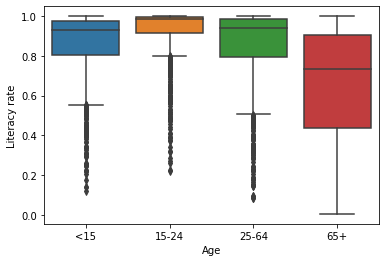

In [286]:
# 2) The next step is to complete an exploration of the data using Python. This should include:
# Two different types of univariate exploratory visualizations. Each visualization must include a brief interpretation within the code file.

sns.boxplot(x = df['Age'],
            y = df['Literacy rate']);
# this suggests that literacy rate is on its lowest at ages 65+
# and peaks at 15 - 24

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


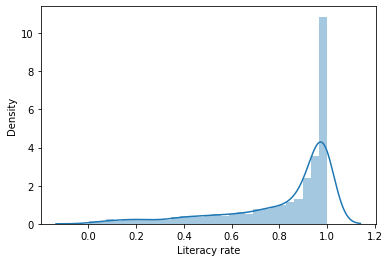

In [287]:
# Two different types of univariate exploratory visualizations. Each visualization must include a brief interpretation within the code file.
x = df['Literacy rate']
fig, ax = plt.subplots();
sns.distplot(x);

# the results suggest that literacy rate is negatively skewed or skewed to the left
# which means that literacy rates are higher globally but is concentrated in a few regions

In [288]:
df.columns

Index(['Region', 'Country', 'Year', 'Age', 'Gender', 'Literacy rate'], dtype='object')

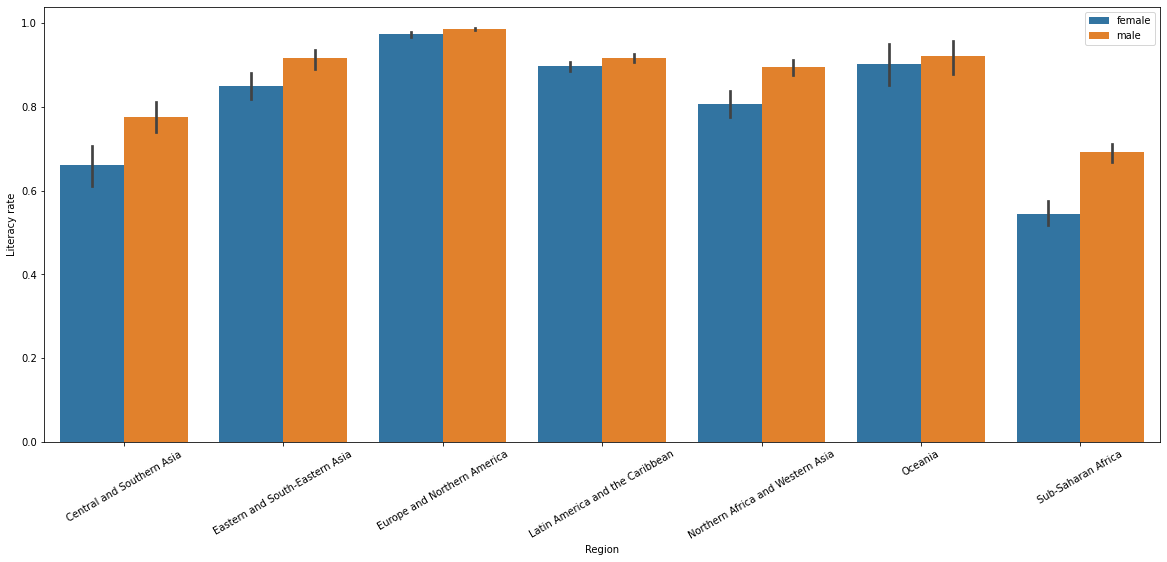

In [289]:
# Two different types of multivariate exploratory visualizations.  Each visualization must include a brief interpretation within the code file.
fig, ax = plt.subplots(figsize = (20,8))
sns.barplot(data = df,
            x = 'Region',
            y= 'Literacy rate',
            hue = 'Gender')
plt.xticks(rotation = 30);
plt.legend(loc = 'upper right');

# this suggests that EU and NA have the highest literacy rate for both genders while sub-saharan Africa has the lowest
# moreover women in central and south asia, and sub saharan africa are disadvantaged in literacy 

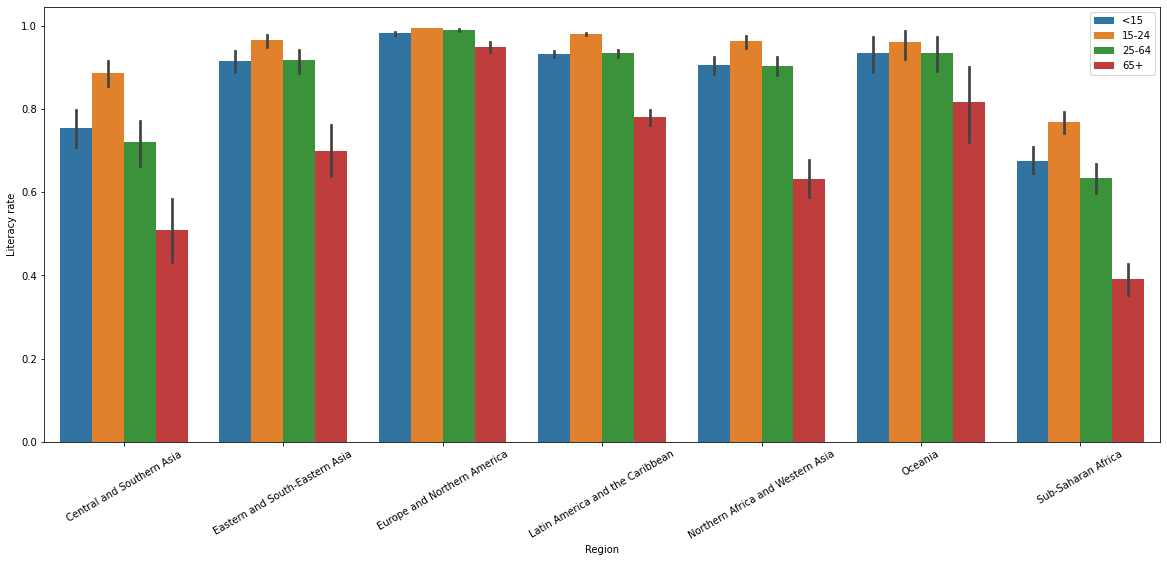

In [290]:
fig, ax = plt.subplots(figsize = (20,8))
sns.barplot(data = df,
            x = 'Region',
            y= 'Literacy rate',
            hue = 'Age')
plt.xticks(rotation = 30);
plt.legend(loc = 'upper right');

# this suggests that people aged 65+ in central SA, east and SEA, north Africa and west Asia, and sub saharan Africa have the lowest literacy
# in all regions ages 15-24 have the highest literacy as it is the ave age for high school and college in general

In [291]:
# Literacy rate is calculated by taking the number of literate persons in that age and gender group divided by the total number of persons in that group. 
# Literate is defined as the ability to both read and write, with understanding, a short, simple statement about everyday life. 
# Literacy rates at or near 100% indicate that (nearly) every individual in that age range and gender group is able to read and write, at least at a basic level.